In [1]:
import pandas as pd
from pathlib import Path
from sqlalchemy import create_engine

df_raw = pd.read_csv("Fiber_Optic_Provider_Coverage.csv")
print("Rows,Cols in raw CSV:", df_raw.shape)

Rows,Cols in raw CSV: (37913, 19)


In [2]:
df_raw.describe()

,GIS Object ID,Provider Type,Provider Registration Number,State FIPS,County FIPS,Census Tract ID,Census Block ID,Full Census Block ID,Technology of Transmission,Maximum Advertised Downstream Speed,Maximum Advertised Upstream Speed,Typical Downstream Speed,Typical Upstream Speed,End User Category,SHAPE.STArea(),SHAPE.STLength()
count,37913.000000,37913.000000,3.791300e+04,37913.0,37913.000000,37913.000000,37913.000000,3.791300e+04,37913.0,37913.000000,37913.000000,1615.000000,1615.000000,1702.000000,3.791300e+04,37913.000000
mean,59010.000000,1.006937,2.846410e+06,24.0,30.577427,626466.132672,1961.735447,2.403120e+14,50.0,9.120513,7.285601,9.642724,9.554799,4.307286,2.495313e+05,1770.154735
std,10944.684715,0.083000,2.747916e+06,0.0,71.224613,188485.257367,972.635398,7.117030e+11,0.0,0.462008,0.980495,2.764267,2.900551,1.242092,8.532749e+05,2349.036608
min,40054.000000,1.000000,2.154367e+06,24.0,1.000000,100.000000,1000.000000,2.400100e+14,50.0,3.000000,3.000000,3.000000,3.000000,1.000000,4.908472e+01,38.269712
25%,49532.000000,1.000000,2.166825e+06,24.0,5.000000,451200.000000,1018.000000,2.400541e+14,50.0,9.000000,7.000000,11.000000,11.000000,4.000000,2.018937e+04,635.904077
50%,59010.000000,1.000000,2.166825e+06,24.0,27.000000,701703.000000,2007.000000,2.402761e+14,50.0,9.000000,7.000000,11.000000,11.000000,5.000000,4.286029e+04,963.609190
75%,68488.000000,1.000000,2.166825e+06,24.0,31.000000,800203.000000,3000.000000,2.403171e+14,50.0,9.000000,7.000000,11.000000,11.000000,5.000000,1.244189e+05,1804.498178
max,77966.000000,2.000000,1.966310e+07,24.0,510.000000,980200.000000,6125.000000,2.451028e+14,50.0,11.000000,11.000000,11.000000,11.000000,5.000000,2.398425e+07,46108.887689


In [3]:
df_raw.head()

,the_geom,GIS Object ID,Provider Name,DBA Name,Provider Type,Provider Registration Number,State FIPS,County FIPS,Census Tract ID,Census Block ID,Full Census Block ID,Technology of Transmission,Maximum Advertised Downstream Speed,Maximum Advertised Upstream Speed,Typical Downstream Speed,Typical Upstream Speed,End User Category,SHAPE.STArea(),SHAPE.STLength()
0,MULTIPOLYGON (((-76.445676000291 39.2072309990...,54945,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,5,451900,3046,240054519003046,50,9,7,NaN,NaN,NaN,46059.028621,1122.806061
1,MULTIPOLYGON (((-76.917063999159 39.0298679988...,77472,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,33,807405,3010,240338074053010,50,9,7,NaN,NaN,NaN,20675.675386,619.440636
2,MULTIPOLYGON (((-77.121931999699 38.9814329993...,63604,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,31,705903,3020,240317059033020,50,9,7,NaN,NaN,NaN,32748.448892,746.717094
3,MULTIPOLYGON (((-77.068592999874 39.0245199983...,66813,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,31,704200,1020,240317042001020,50,9,7,NaN,NaN,NaN,95609.261045,2342.656699
4,MULTIPOLYGON (((-76.613294000221 39.2336199991...,43907,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,3,750102,1031,240037501021031,50,9,7,NaN,NaN,NaN,22416.724347,673.890399


In [4]:
df_raw.dtypes

the_geom                                object
GIS Object ID                            int64
Provider Name                           object
DBA Name                                object
Provider Type                            int64
Provider Registration Number             int64
State FIPS                               int64
County FIPS                              int64
Census Tract ID                          int64
Census Block ID                          int64
Full Census Block ID                     int64
Technology of Transmission               int64
Maximum Advertised Downstream Speed      int64
Maximum Advertised Upstream Speed        int64
Typical Downstream Speed               float64
Typical Upstream Speed                 float64
End User Category                      float64
SHAPE.STArea()                         float64
SHAPE.STLength()                       float64
dtype: object

In [5]:
df_raw.isna().sum()

the_geom                                   0
GIS Object ID                              0
Provider Name                              0
DBA Name                                   0
Provider Type                              0
Provider Registration Number               0
State FIPS                                 0
County FIPS                                0
Census Tract ID                            0
Census Block ID                            0
Full Census Block ID                       0
Technology of Transmission                 0
Maximum Advertised Downstream Speed        0
Maximum Advertised Upstream Speed          0
Typical Downstream Speed               36298
Typical Upstream Speed                 36298
End User Category                      36211
SHAPE.STArea()                             0
SHAPE.STLength()                           0
dtype: int64

Creating a Fiber DB and saving Raw Data in a table

In [6]:
import sqlite3
engine = create_engine("sqlite:///fiber.db", echo=False)

df_raw.to_sql("raw_data", engine, if_exists="replace", index=False)

df_from_db = pd.read_sql("SELECT COUNT(*) AS cnt FROM raw_data", engine) # fetching row count
print("Row count in DB (raw_data):", int(df_from_db.loc[0, "cnt"]))

preview = pd.read_sql("SELECT * FROM raw_data LIMIT 5", engine) # reading data from DB and previewing first 5 rows
display(preview)

Row count in DB (raw_data): 37913


,the_geom,GIS Object ID,Provider Name,DBA Name,Provider Type,Provider Registration Number,State FIPS,County FIPS,Census Tract ID,Census Block ID,Full Census Block ID,Technology of Transmission,Maximum Advertised Downstream Speed,Maximum Advertised Upstream Speed,Typical Downstream Speed,Typical Upstream Speed,End User Category,SHAPE.STArea(),SHAPE.STLength()
0,MULTIPOLYGON (((-76.445676000291 39.2072309990...,54945,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,5,451900,3046,240054519003046,50,9,7,None,None,None,46059.028621,1122.806061
1,MULTIPOLYGON (((-76.917063999159 39.0298679988...,77472,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,33,807405,3010,240338074053010,50,9,7,None,None,None,20675.675386,619.440636
2,MULTIPOLYGON (((-77.121931999699 38.9814329993...,63604,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,31,705903,3020,240317059033020,50,9,7,None,None,None,32748.448892,746.717094
3,MULTIPOLYGON (((-77.068592999874 39.0245199983...,66813,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,31,704200,1020,240317042001020,50,9,7,None,None,None,95609.261045,2342.656699
4,MULTIPOLYGON (((-76.613294000221 39.2336199991...,43907,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,3,750102,1031,240037501021031,50,9,7,None,None,None,22416.724347,673.890399


In [7]:
from shapely import wkt
import geopandas as gpd

df_raw_db = pd.read_sql("SELECT * FROM raw_data", engine)
df_raw_db["geometry"] = df_raw_db["the_geom"].apply(wkt.loads)# turns text to shapely geometry

gdf = gpd.GeoDataFrame(df_raw_db, geometry="geometry", crs="EPSG:4326")#EPSG:4326: tell GeoPandas what coordinate system the shapes are in

print("GeoDataFrame created:", gdf.shape)
gdf.head()

GeoDataFrame created: (37913, 20)


,the_geom,GIS Object ID,Provider Name,DBA Name,Provider Type,Provider Registration Number,State FIPS,County FIPS,Census Tract ID,Census Block ID,Full Census Block ID,Technology of Transmission,Maximum Advertised Downstream Speed,Maximum Advertised Upstream Speed,Typical Downstream Speed,Typical Upstream Speed,End User Category,SHAPE.STArea(),SHAPE.STLength(),geometry
0,MULTIPOLYGON (((-76.445676000291 39.2072309990...,54945,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,5,451900,3046,240054519003046,50,9,7,NaN,NaN,NaN,46059.028621,1122.806061,"MULTIPOLYGON (((-76.44568 39.20723, -76.44646 ..."
1,MULTIPOLYGON (((-76.917063999159 39.0298679988...,77472,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,33,807405,3010,240338074053010,50,9,7,NaN,NaN,NaN,20675.675386,619.440636,"MULTIPOLYGON (((-76.91706 39.02987, -76.91694 ..."
2,MULTIPOLYGON (((-77.121931999699 38.9814329993...,63604,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,31,705903,3020,240317059033020,50,9,7,NaN,NaN,NaN,32748.448892,746.717094,"MULTIPOLYGON (((-77.12193 38.98143, -77.12221 ..."
3,MULTIPOLYGON (((-77.068592999874 39.0245199983...,66813,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,31,704200,1020,240317042001020,50,9,7,NaN,NaN,NaN,95609.261045,2342.656699,"MULTIPOLYGON (((-77.06859 39.02452, -77.06864 ..."
4,MULTIPOLYGON (((-76.613294000221 39.2336199991...,43907,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,3,750102,1031,240037501021031,50,9,7,NaN,NaN,NaN,22416.724347,673.890399,"MULTIPOLYGON (((-76.61329 39.23362, -76.61309 ..."


In [8]:
# CELL 3 — Reproject GeoDataFrame to EPSG:3857 for spatial analysis in meters

gdf_3857 = gdf.to_crs(epsg=3857)

print("Reprojected GeoDataFrame shape:", gdf_3857.shape)
gdf_3857.head()

Reprojected GeoDataFrame shape: (37913, 20)


,the_geom,GIS Object ID,Provider Name,DBA Name,Provider Type,Provider Registration Number,State FIPS,County FIPS,Census Tract ID,Census Block ID,Full Census Block ID,Technology of Transmission,Maximum Advertised Downstream Speed,Maximum Advertised Upstream Speed,Typical Downstream Speed,Typical Upstream Speed,End User Category,SHAPE.STArea(),SHAPE.STLength(),geometry
0,MULTIPOLYGON (((-76.445676000291 39.2072309990...,54945,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,5,451900,3046,240054519003046,50,9,7,NaN,NaN,NaN,46059.028621,1122.806061,"MULTIPOLYGON (((-8509893.726 4751399.256, -850..."
1,MULTIPOLYGON (((-76.917063999159 39.0298679988...,77472,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,33,807405,3010,240338074053010,50,9,7,NaN,NaN,NaN,20675.675386,619.440636,"MULTIPOLYGON (((-8562368.398 4725950.811, -856..."
2,MULTIPOLYGON (((-77.121931999699 38.9814329993...,63604,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,31,705903,3020,240317059033020,50,9,7,NaN,NaN,NaN,32748.448892,746.717094,"MULTIPOLYGON (((-8585174.199 4719012.358, -858..."
3,MULTIPOLYGON (((-77.068592999874 39.0245199983...,66813,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,31,704200,1020,240317042001020,50,9,7,NaN,NaN,NaN,95609.261045,2342.656699,"MULTIPOLYGON (((-8579236.529 4725184.461, -857..."
4,MULTIPOLYGON (((-76.613294000221 39.2336199991...,43907,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,3,750102,1031,240037501021031,50,9,7,NaN,NaN,NaN,22416.724347,673.890399,"MULTIPOLYGON (((-8528552.876 4755191.094, -852..."


In [9]:
gdf_3857["area_m2"] = gdf_3857.geometry.area # adding new column for area in square meters and perimeter in meters
gdf_3857["perimeter_m"] = gdf_3857.geometry.length

gdf_3857[["area_m2", "perimeter_m"]].head()

,area_m2,perimeter_m
0,46059.028629,1122.806061
1,20675.675375,619.440636
2,32748.448899,746.717094
3,95609.261061,2342.656699
4,22416.724343,673.890399


In [10]:
missing_values = gdf_3857.isna().sum()
print("Missing values are:\n")
print(missing_values)

Missing values are:

the_geom                                   0
GIS Object ID                              0
Provider Name                              0
DBA Name                                   0
Provider Type                              0
Provider Registration Number               0
State FIPS                                 0
County FIPS                                0
Census Tract ID                            0
Census Block ID                            0
Full Census Block ID                       0
Technology of Transmission                 0
Maximum Advertised Downstream Speed        0
Maximum Advertised Upstream Speed          0
Typical Downstream Speed               36298
Typical Upstream Speed                 36298
End User Category                      36211
SHAPE.STArea()                             0
SHAPE.STLength()                           0
geometry                                   0
area_m2                                    0
perimeter_m                       

In [11]:
cols_to_drop = ["Typical Downstream Speed","Typical Upstream Speed","End User Category"] # almost entire columns are missing values, so dropping them

gdf_clean = gdf_3857.drop(columns=cols_to_drop)

print("gdf_clean shape:", gdf_clean.shape)
gdf_clean.head()

gdf_clean shape: (37913, 19)


,the_geom,GIS Object ID,Provider Name,DBA Name,Provider Type,Provider Registration Number,State FIPS,County FIPS,Census Tract ID,Census Block ID,Full Census Block ID,Technology of Transmission,Maximum Advertised Downstream Speed,Maximum Advertised Upstream Speed,SHAPE.STArea(),SHAPE.STLength(),geometry,area_m2,perimeter_m
0,MULTIPOLYGON (((-76.445676000291 39.2072309990...,54945,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,5,451900,3046,240054519003046,50,9,7,46059.028621,1122.806061,"MULTIPOLYGON (((-8509893.726 4751399.256, -850...",46059.028629,1122.806061
1,MULTIPOLYGON (((-76.917063999159 39.0298679988...,77472,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,33,807405,3010,240338074053010,50,9,7,20675.675386,619.440636,"MULTIPOLYGON (((-8562368.398 4725950.811, -856...",20675.675375,619.440636
2,MULTIPOLYGON (((-77.121931999699 38.9814329993...,63604,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,31,705903,3020,240317059033020,50,9,7,32748.448892,746.717094,"MULTIPOLYGON (((-8585174.199 4719012.358, -858...",32748.448899,746.717094
3,MULTIPOLYGON (((-77.068592999874 39.0245199983...,66813,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,31,704200,1020,240317042001020,50,9,7,95609.261045,2342.656699,"MULTIPOLYGON (((-8579236.529 4725184.461, -857...",95609.261061,2342.656699
4,MULTIPOLYGON (((-76.613294000221 39.2336199991...,43907,Verizon Communications Inc,Verizon Maryland Inc.,1,2166825,24,3,750102,1031,240037501021031,50,9,7,22416.724347,673.890399,"MULTIPOLYGON (((-8528552.876 4755191.094, -852...",22416.724343,673.890399


In [12]:
gdf_encoded = pd.get_dummies(gdf_clean, columns=["Provider Name"], prefix="provider") # one-hot encoding for 'Provider Name' categorical column

gdf_encoded.head()

,the_geom,GIS Object ID,DBA Name,Provider Type,Provider Registration Number,State FIPS,County FIPS,Census Tract ID,Census Block ID,Full Census Block ID,...,provider_Cogent Communications Group,provider_Easton Utilities Commission,provider_FiberLight LLC,"provider_Level 3 Communications, LLC","provider_Mountain Communications, LLC","provider_PAETEC Communications, Inc.",provider_QCOL Inc.,provider_Verizon Communications Inc,"provider_Zayo Group, LLC",provider_tw telecom of maryland llc
0,MULTIPOLYGON (((-76.445676000291 39.2072309990...,54945,Verizon Maryland Inc.,1,2166825,24,5,451900,3046,240054519003046,...,False,False,False,False,False,False,False,True,False,False
1,MULTIPOLYGON (((-76.917063999159 39.0298679988...,77472,Verizon Maryland Inc.,1,2166825,24,33,807405,3010,240338074053010,...,False,False,False,False,False,False,False,True,False,False
2,MULTIPOLYGON (((-77.121931999699 38.9814329993...,63604,Verizon Maryland Inc.,1,2166825,24,31,705903,3020,240317059033020,...,False,False,False,False,False,False,False,True,False,False
3,MULTIPOLYGON (((-77.068592999874 39.0245199983...,66813,Verizon Maryland Inc.,1,2166825,24,31,704200,1020,240317042001020,...,False,False,False,False,False,False,False,True,False,False
4,MULTIPOLYGON (((-76.613294000221 39.2336199991...,43907,Verizon Maryland Inc.,1,2166825,24,3,750102,1031,240037501021031,...,False,False,False,False,False,False,False,True,False,False


In [13]:
from sklearn.preprocessing import LabelEncoder

label_cols = ["Provider Type", "State FIPS", "County FIPS"]# label encoding for these categorical columns

le = LabelEncoder()

for col in label_cols:
    gdf_encoded[col] = le.fit_transform(gdf_encoded[col])

gdf_encoded[label_cols].head()

,Provider Type,State FIPS,County FIPS
0,0,0,2
1,0,0,15
2,0,0,14
3,0,0,14
4,0,0,1


In [14]:
# CELL 9 — Scaling numeric features (StandardScaler and MinMaxScaler)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

numeric_cols = ["Maximum Advertised Downstream Speed","Maximum Advertised Upstream Speed","SHAPE.STArea()","SHAPE.STLength()","area_m2",
                "perimeter_m"]# selecting only numeric columns for scaling

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Fit-transform the columns using both scalers and create new columns for each scaled version 
# as different models may require different scaling techniques
gdf_encoded[[col + "_std" for col in numeric_cols]] = standard_scaler.fit_transform(gdf_encoded[numeric_cols])
gdf_encoded[[col + "_minmax" for col in numeric_cols]] = minmax_scaler.fit_transform(gdf_encoded[numeric_cols])

gdf_encoded.head()


,the_geom,GIS Object ID,DBA Name,Provider Type,Provider Registration Number,State FIPS,County FIPS,Census Tract ID,Census Block ID,Full Census Block ID,...,SHAPE.STArea()_std,SHAPE.STLength()_std,area_m2_std,perimeter_m_std,Maximum Advertised Downstream Speed_minmax,Maximum Advertised Upstream Speed_minmax,SHAPE.STArea()_minmax,SHAPE.STLength()_minmax,area_m2_minmax,perimeter_m_minmax
0,MULTIPOLYGON (((-76.445676000291 39.2072309990...,54945,Verizon Maryland Inc.,0,2166825,0,2,451900,3046,240054519003046,...,-0.238464,-0.275584,-0.238464,-0.275584,0.75,0.5,0.001918,0.023541,0.001918,0.023541
1,MULTIPOLYGON (((-76.917063999159 39.0298679988...,77472,Verizon Maryland Inc.,0,2166825,0,15,807405,3010,240338074053010,...,-0.268212,-0.489873,-0.268212,-0.489873,0.75,0.5,0.000860,0.012615,0.000860,0.012615
2,MULTIPOLYGON (((-77.121931999699 38.9814329993...,63604,Verizon Maryland Inc.,0,2166825,0,14,705903,3020,240317059033020,...,-0.254063,-0.435690,-0.254063,-0.435690,0.75,0.5,0.001363,0.015377,0.001363,0.015377
3,MULTIPOLYGON (((-77.068592999874 39.0245199983...,66813,Verizon Maryland Inc.,0,2166825,0,14,704200,1020,240317042001020,...,-0.180392,0.243721,-0.180392,0.243721,0.75,0.5,0.003984,0.050019,0.003984,0.050019
4,MULTIPOLYGON (((-76.613294000221 39.2336199991...,43907,Verizon Maryland Inc.,0,2166825,0,1,750102,1031,240037501021031,...,-0.266172,-0.466693,-0.266172,-0.466693,0.75,0.5,0.000933,0.013797,0.000933,0.013797


In [15]:
gdf_encoded.isna().sum() # final check for any missing values before saving to DB

the_geom                                      0
GIS Object ID                                 0
DBA Name                                      0
Provider Type                                 0
Provider Registration Number                  0
State FIPS                                    0
County FIPS                                   0
Census Tract ID                               0
Census Block ID                               0
Full Census Block ID                          0
Technology of Transmission                    0
Maximum Advertised Downstream Speed           0
Maximum Advertised Upstream Speed             0
SHAPE.STArea()                                0
SHAPE.STLength()                              0
geometry                                      0
area_m2                                       0
perimeter_m                                   0
provider_Allied Telecom Group, LLC            0
provider_Anne Arundel Broadband               0
provider_Antietam Cable Television, Inc.

Saving processed data to SQL database

In [16]:
# Convert geometry to WKT for DB storage
gdf_encoded["geometry_wkt"] = gdf_encoded["geometry"].apply(lambda geom: geom.wkt)

# Drop the geometry column (DBs can't store shapely objects)
df_to_save = gdf_encoded.drop(columns=["geometry"])

# Save to SQL database
df_to_save.to_sql("fiber_optic_processed", con=engine, if_exists="replace", index=False)

37913

visualization:


In [17]:
df_vis = pd.read_sql("SELECT * FROM fiber_optic_processed", con=engine)

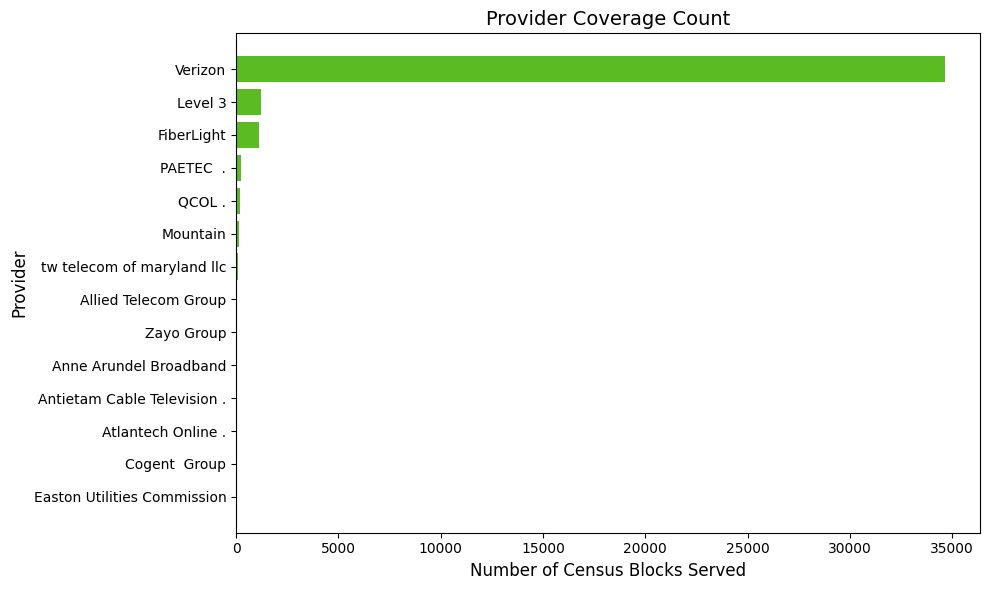

In [18]:
# horizontal bar chart for Provider Coverage Counts

import matplotlib.pyplot as plt

provider_cols = [col for col in df_vis.columns if col.startswith("provider_")] # selecting only provider one-hot encoded columns

provider_counts = df_vis[provider_cols].sum().sort_values(ascending=True) # summing up counts for each provider in ascending order

# Shorten provider names for display
short_labels = (
    provider_counts.index
    .str.replace(r'provider_|Communications|Inc|LLC|,', '', regex=True)
    .str.strip())

plt.figure(figsize=(10, 6))
plt.barh(short_labels, provider_counts, color="#5ABB22")

plt.title("Provider Coverage Count", fontsize=14)
plt.xlabel("Number of Census Blocks Served", fontsize=12)
plt.ylabel("Provider", fontsize=12)

plt.tight_layout()
plt.savefig("provider_coverage_count.png", dpi=300)
plt.show()

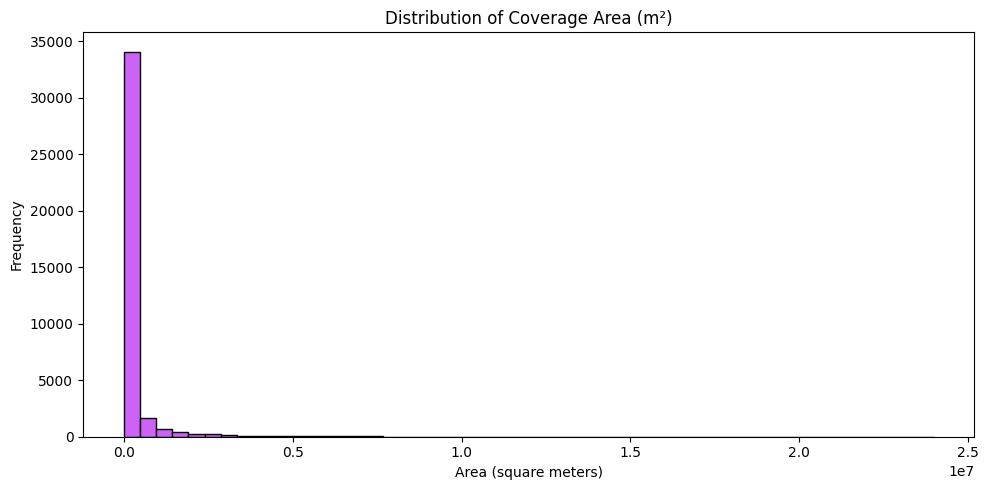

In [19]:
# Histogram of Area (area_m2)

plt.figure(figsize=(10, 5))
plt.hist(df_vis["area_m2"], bins=50, color="#CC62F6", edgecolor="black")

plt.title("Distribution of Coverage Area (m²)")
plt.xlabel("Area (square meters)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig("area_distribution_histogram.png", dpi=300)
plt.show()

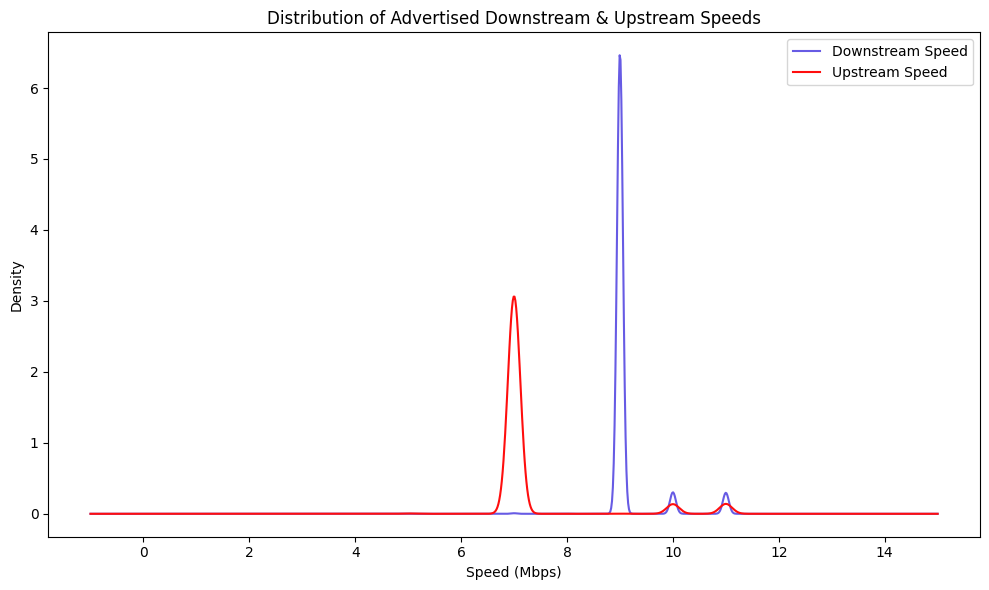

In [20]:
#KDE Plot for Downstream & Upstream Speeds

plt.figure(figsize=(10, 6))

# Plot downstream speed distribution
df_vis["Maximum Advertised Downstream Speed"].plot(kind="kde", label="Downstream Speed", color="#675BE4")

# Plot upstream speed distribution
df_vis["Maximum Advertised Upstream Speed"].plot(kind="kde", label="Upstream Speed", color="#FF0E0EFF")

plt.title("Distribution of Advertised Downstream & Upstream Speeds")
plt.xlabel("Speed (Mbps)")
plt.ylabel("Density")

plt.legend()
plt.tight_layout()
plt.savefig("speed_distribution_kde.png", dpi=300)
plt.show()

In [21]:
# Loading processed data again for geo visualization

df_geo = pd.read_sql("SELECT * FROM fiber_optic_processed", con=engine)

# Convert WKT back to geometry
df_geo["geometry"] = df_geo["geometry_wkt"].apply(wkt.loads)

# Create GeoDataFrame in EPSG:3857 (stored CRS)
gdf_map = gpd.GeoDataFrame(df_geo, geometry="geometry", crs="EPSG:3857")

# Reproject to EPSG:4326 for mapping
gdf_map = gdf_map.to_crs(epsg=4326)

gdf_map.head()

,the_geom,GIS Object ID,DBA Name,Provider Type,Provider Registration Number,State FIPS,County FIPS,Census Tract ID,Census Block ID,Full Census Block ID,...,area_m2_std,perimeter_m_std,Maximum Advertised Downstream Speed_minmax,Maximum Advertised Upstream Speed_minmax,SHAPE.STArea()_minmax,SHAPE.STLength()_minmax,area_m2_minmax,perimeter_m_minmax,geometry_wkt,geometry
0,MULTIPOLYGON (((-76.445676000291 39.2072309990...,54945,Verizon Maryland Inc.,0,2166825,0,2,451900,3046,240054519003046,...,-0.238464,-0.275584,0.75,0.5,0.001918,0.023541,0.001918,0.023541,MULTIPOLYGON (((-8509893.725699969 4751399.255...,"MULTIPOLYGON (((-76.44568 39.20723, -76.44646 ..."
1,MULTIPOLYGON (((-76.917063999159 39.0298679988...,77472,Verizon Maryland Inc.,0,2166825,0,15,807405,3010,240338074053010,...,-0.268212,-0.489873,0.75,0.5,0.000860,0.012615,0.000860,0.012615,MULTIPOLYGON (((-8562368.397700014 4725950.810...,"MULTIPOLYGON (((-76.91706 39.02987, -76.91694 ..."
2,MULTIPOLYGON (((-77.121931999699 38.9814329993...,63604,Verizon Maryland Inc.,0,2166825,0,14,705903,3020,240317059033020,...,-0.254063,-0.435690,0.75,0.5,0.001363,0.015377,0.001363,0.015377,MULTIPOLYGON (((-8585174.199199963 4719012.357...,"MULTIPOLYGON (((-77.12193 38.98143, -77.12221 ..."
3,MULTIPOLYGON (((-77.068592999874 39.0245199983...,66813,Verizon Maryland Inc.,0,2166825,0,14,704200,1020,240317042001020,...,-0.180392,0.243721,0.75,0.5,0.003984,0.050019,0.003984,0.050019,MULTIPOLYGON (((-8579236.528900022 4725184.460...,"MULTIPOLYGON (((-77.06859 39.02452, -77.06864 ..."
4,MULTIPOLYGON (((-76.613294000221 39.2336199991...,43907,Verizon Maryland Inc.,0,2166825,0,1,750102,1031,240037501021031,...,-0.266172,-0.466693,0.75,0.5,0.000933,0.013797,0.000933,0.013797,MULTIPOLYGON (((-8528552.876099963 4755191.094...,"MULTIPOLYGON (((-76.61329 39.23362, -76.61309 ..."


<Figure size 1000x1000 with 0 Axes>

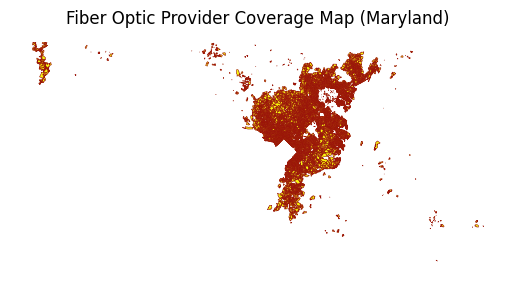

In [22]:
# C2 — simple geo map showing the geographic coverage

plt.figure(figsize=(10, 10))
gdf_map.plot(edgecolor="#9B150B", facecolor="#F6F606F7", linewidth=0.4) # shows Fiber coverage area in maryland, regardless of provide

plt.title("Fiber Optic Provider Coverage Map (Maryland)")
plt.axis("off")
plt.savefig("Fiber_Coverage_area_(MARYLAND)", dpi=300)
plt.show()

Model Preparation:

In [23]:
import sqlite3
import pandas as pd

# Connect to DB
conn = sqlite3.connect("fiber.db")

# Load processed table (this is the table we saved earlier)
df_model = pd.read_sql("SELECT * FROM fiber_optic_processed", conn)

print("Loaded shape:", df_model.shape)
df_model.head()

Loaded shape: (37913, 44)


,the_geom,GIS Object ID,DBA Name,Provider Type,Provider Registration Number,State FIPS,County FIPS,Census Tract ID,Census Block ID,Full Census Block ID,...,SHAPE.STLength()_std,area_m2_std,perimeter_m_std,Maximum Advertised Downstream Speed_minmax,Maximum Advertised Upstream Speed_minmax,SHAPE.STArea()_minmax,SHAPE.STLength()_minmax,area_m2_minmax,perimeter_m_minmax,geometry_wkt
0,MULTIPOLYGON (((-76.445676000291 39.2072309990...,54945,Verizon Maryland Inc.,0,2166825,0,2,451900,3046,240054519003046,...,-0.275584,-0.238464,-0.275584,0.75,0.5,0.001918,0.023541,0.001918,0.023541,MULTIPOLYGON (((-8509893.725699969 4751399.255...
1,MULTIPOLYGON (((-76.917063999159 39.0298679988...,77472,Verizon Maryland Inc.,0,2166825,0,15,807405,3010,240338074053010,...,-0.489873,-0.268212,-0.489873,0.75,0.5,0.000860,0.012615,0.000860,0.012615,MULTIPOLYGON (((-8562368.397700014 4725950.810...
2,MULTIPOLYGON (((-77.121931999699 38.9814329993...,63604,Verizon Maryland Inc.,0,2166825,0,14,705903,3020,240317059033020,...,-0.435690,-0.254063,-0.435690,0.75,0.5,0.001363,0.015377,0.001363,0.015377,MULTIPOLYGON (((-8585174.199199963 4719012.357...
3,MULTIPOLYGON (((-77.068592999874 39.0245199983...,66813,Verizon Maryland Inc.,0,2166825,0,14,704200,1020,240317042001020,...,0.243721,-0.180392,0.243721,0.75,0.5,0.003984,0.050019,0.003984,0.050019,MULTIPOLYGON (((-8579236.528900022 4725184.460...
4,MULTIPOLYGON (((-76.613294000221 39.2336199991...,43907,Verizon Maryland Inc.,0,2166825,0,1,750102,1031,240037501021031,...,-0.466693,-0.266172,-0.466693,0.75,0.5,0.000933,0.013797,0.000933,0.013797,MULTIPOLYGON (((-8528552.876099963 4755191.094...


In [24]:
# find and drop geometry columns 
geometry_columns = [col for col in df_model.columns 
                    if "geom" in col.lower() or "geometry" in col.lower()]

print("Geometry columns removed:", geometry_columns)

df_model_clean = df_model.drop(columns=geometry_columns)
df_model.shape

Geometry columns removed: ['the_geom', 'geometry_wkt']


(37913, 44)

In [25]:
non_numeric_cols = df_model.select_dtypes(include=["object"]).columns # checking all non=numeric columns in the df
print("Non-numeric columns:", non_numeric_cols.tolist())

Non-numeric columns: ['the_geom', 'DBA Name', 'geometry_wkt']


In [26]:
df_model = df_model.drop(columns=non_numeric_cols) # dropping non-numeric columns
print("Shape after removing columns:", df_model.shape)

Shape after removing columns: (37913, 41)


In [27]:
df_model.select_dtypes(include=["object"]).columns # Checking the dtype before model training

Index([], dtype='object')

In [28]:
df_model.columns# checking all the columns in training data

Index(['GIS Object ID', 'Provider Type', 'Provider Registration Number',
       'State FIPS', 'County FIPS', 'Census Tract ID', 'Census Block ID',
       'Full Census Block ID', 'Technology of Transmission',
       'Maximum Advertised Downstream Speed',
       'Maximum Advertised Upstream Speed', 'SHAPE.STArea()',
       'SHAPE.STLength()', 'area_m2', 'perimeter_m',
       'provider_Allied Telecom Group, LLC', 'provider_Anne Arundel Broadband',
       'provider_Antietam Cable Television, Inc.',
       'provider_Atlantech Online, Inc.',
       'provider_Cogent Communications Group',
       'provider_Easton Utilities Commission', 'provider_FiberLight LLC',
       'provider_Level 3 Communications, LLC',
       'provider_Mountain Communications, LLC',
       'provider_PAETEC Communications, Inc.', 'provider_QCOL Inc.',
       'provider_Verizon Communications Inc', 'provider_Zayo Group, LLC',
       'provider_tw telecom of maryland llc',
       'Maximum Advertised Downstream Speed_std',
   

In [29]:
df_model["coverage_quality_score"] = (
    df_model["Maximum Advertised Downstream Speed_minmax"] * 0.5 +
    df_model["Maximum Advertised Upstream Speed_minmax"] * 0.3 +
    df_model["area_m2_minmax"] * 0.2) # Adding regression target (coverage_quality_score)

In [30]:
median_score = df_model["coverage_quality_score"].median()

df_model["network_quality_label"] = (
    df_model["coverage_quality_score"] > median_score
).astype(int) #Adding classification label (high vs low quality)

In [31]:
print(df_model.select_dtypes(include=["object"]).columns.tolist()) # checking for any non-numeric columns

[]


In [32]:
df_model.to_sql("fiber_optic_model_prepared", conn, if_exists="replace", index=False) # saving Final ready df to db

37913

In [33]:
y_reg = df_model["coverage_quality_score"] # Creating X and Y for Regression model with target variable as coverage quality score
X_reg = df_model.drop(columns=["coverage_quality_score", "network_quality_label"])

In [34]:
y_clf = df_model["network_quality_label"] # creating X and Y for classification model with target variable as network quality label
X_clf = df_model.drop(columns=["coverage_quality_score", "network_quality_label"])

In [35]:
from sklearn.model_selection import train_test_split # splitting training and testing data

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=4)

Random Forest Regression: Target Variable (coverage_quality_score)

In [36]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=150,
    random_state=42,
    n_jobs=-1) # Training Random forest regressor 

rf_reg.fit(X_train_reg, y_train_reg)

,n_estimators,150
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred_reg = rf_reg.predict(X_test_reg)

rf_mae  = mean_absolute_error(y_test_reg, y_pred_reg)
rf_rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
rf_r2   = r2_score(y_test_reg, y_pred_reg)

print("rf_mae:", rf_mae)
print("rf_rmse:", rf_rmse)
print("rf_r2:", rf_r2)

rf_mae: 5.6135673017732585e-05
rf_rmse: 0.0012902277518510427
rf_r2: 0.9995975127258732


10 Fold Cross Validation: Target Variable (coverage_quality_score)

In [38]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    rf_reg, X_reg, y_reg, cv=10, scoring="r2") # 10 fold cross-Validation

cv_scores = cross_val_score(rf_reg, X_reg, y_reg, cv=10, scoring="r2")
cv_mean_score = cv_scores.mean()

print("cv_scores:", cv_scores)
print("cv_mean_score:", cv_mean_score)

cv_scores: [0.99977685 0.99962912 0.99905552 0.9999687  0.99989847 0.99951049
 0.99951368 0.99995479 0.99982429 0.99994895]
cv_mean_score: 0.9997080851026825


Logistic Regression:Target Variable (network_quality_label)

In [39]:
y_clf.value_counts() # 1 is high quality and 0 is low quality areas

network_quality_label
0    18957
1    18956
Name: count, dtype: int64

In [40]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=2000) # Training the model

log_clf.fit(X_train_clf, y_train_clf)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_log = log_clf.predict(X_test_clf)

log_acc       = accuracy_score(y_test_clf, y_pred_log)
log_precision = precision_score(y_test_clf, y_pred_log)
log_recall    = recall_score(y_test_clf, y_pred_log)
log_f1        = f1_score(y_test_clf, y_pred_log) # Evaluvating the model
Confusion_Matrix = confusion_matrix(y_test_clf, y_pred_log)

Random Forest Classification:Target Variable (network_quality_label)

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=150,
    random_state=42,
    n_jobs=-1) # Training random forest classification

rf_clf.fit(X_train_clf, y_train_clf)

,n_estimators,150
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
y_pred_rf = rf_clf.predict(X_test_clf)

rf_acc       = accuracy_score(y_test_clf, y_pred_rf)
rf_precision = precision_score(y_test_clf, y_pred_rf)
rf_recall    = recall_score(y_test_clf, y_pred_rf)
rf_f1        = f1_score(y_test_clf, y_pred_rf)

K-MEANS CLUSTERING (FULL FEATURES)

In [44]:
cluster_features = ["Maximum Advertised Downstream Speed_minmax","Maximum Advertised Upstream Speed_minmax","area_m2_minmax"]

provider_cols = [c for c in df_model.columns if c.startswith("provider_")]

cluster_features = cluster_features + provider_cols

X_cluster = df_model[cluster_features]

print("Clustering feature shape:", X_cluster.shape)

Clustering feature shape: (37913, 17)


In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3,
    random_state=42,
    n_init=10
)

df_model["cluster_label"] = kmeans.fit_predict(X_cluster)

In [46]:
cluster_summary = df_model.groupby("cluster_label")[cluster_features].mean()
cluster_summary

,Maximum Advertised Downstream Speed_minmax,Maximum Advertised Upstream Speed_minmax,area_m2_minmax,"provider_Allied Telecom Group, LLC",provider_Anne Arundel Broadband,"provider_Antietam Cable Television, Inc.","provider_Atlantech Online, Inc.",provider_Cogent Communications Group,provider_Easton Utilities Commission,provider_FiberLight LLC,"provider_Level 3 Communications, LLC","provider_Mountain Communications, LLC","provider_PAETEC Communications, Inc.",provider_QCOL Inc.,provider_Verizon Communications Inc,"provider_Zayo Group, LLC",provider_tw telecom of maryland llc
cluster_label,,,,,,,,,,,,,,,,,
0,0.750058,0.499913,0.009682,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.999827,0.000173,0.000000
1,1.000000,1.000000,0.021806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.878390,0.862470,0.015756,0.028571,0.019855,0.013559,0.009685,0.007748,0.002421,0.546247,0.0,0.080387,0.127361,0.100242,0.000000,0.018402,0.045521


In [47]:
model_comparison = pd.DataFrame([
    ["Random Forest Regressor", "Regression", "coverage_quality_score", "R² Score", rf_r2],
    ["Random Forest Regressor", "Regression", "coverage_quality_score", "MAE", rf_mae],
    ["Random Forest Regressor", "Regression", "coverage_quality_score", "RMSE", rf_rmse],
    ["Random Forest Regressor (10-Fold CV)", "Regression (CV)", "coverage_quality_score", "Mean CV R²", cv_mean_score],

    ["Logistic Regression", "Classification", "network_quality_label", "Accuracy", log_acc],
    ["Logistic Regression", "Classification", "network_quality_label", "Precision", log_precision],
    ["Logistic Regression", "Classification", "network_quality_label", "Recall", log_recall],
    ["Logistic Regression", "Classification", "network_quality_label", "F1 Score", log_f1],

    ["Random Forest Classifier", "Classification", "network_quality_label", "Accuracy", rf_acc],
    ["Random Forest Classifier", "Classification", "network_quality_label", "Precision", rf_precision],
    ["Random Forest Classifier", "Classification", "network_quality_label", "Recall", rf_recall],
    ["Random Forest Classifier", "Classification", "network_quality_label", "F1 Score", rf_f1],

    ["K-Means (k=3)", "Unsupervised", "None", "Inertia (Lower is Better)", kmeans.inertia_]

], columns=[
    "Model",
    "Learning Type",
    "Target Variable",
    "Evaluation Metric",
    "Score"
])

model_comparison


,Model,Learning Type,Target Variable,Evaluation Metric,Score
0,Random Forest Regressor,Regression,coverage_quality_score,R² Score,0.999598
1,Random Forest Regressor,Regression,coverage_quality_score,MAE,0.000056
2,Random Forest Regressor,Regression,coverage_quality_score,RMSE,0.001290
3,Random Forest Regressor (10-Fold CV),Regression (CV),coverage_quality_score,Mean CV R²,0.999708
4,Logistic Regression,Classification,network_quality_label,Accuracy,0.614401
5,Logistic Regression,Classification,network_quality_label,Precision,0.976268
6,Logistic Regression,Classification,network_quality_label,Recall,0.237720
7,Logistic Regression,Classification,network_quality_label,F1 Score,0.382341
8,Random Forest Classifier,Classification,network_quality_label,Accuracy,0.999736
9,Random Forest Classifier,Classification,network_quality_label,Precision,0.999475


Comparison Table

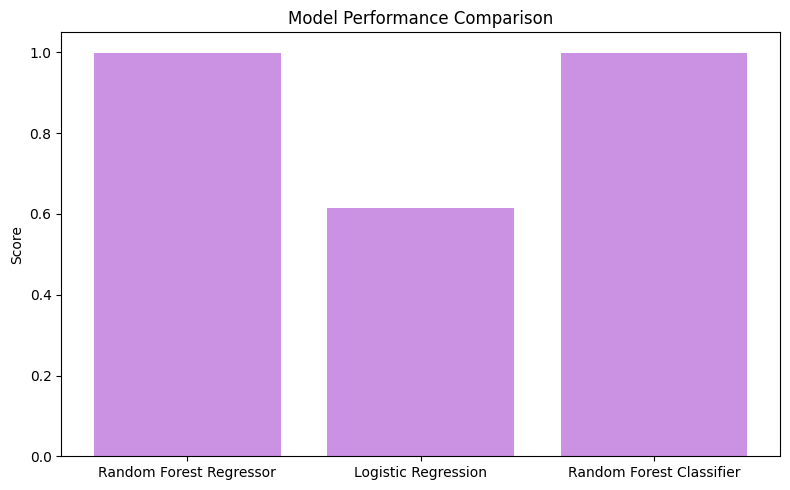

In [48]:
model_comparison = pd.DataFrame({
    "Model": [
        "Random Forest Regressor",
        "Logistic Regression",
        "Random Forest Classifier"
    ],
    "Evaluation Metric": [
        "R² Score",
        "Accuracy",
        "Accuracy"
    ],
    "Score": [
        rf_r2,     # regression performance
        log_acc,   # logistic regression accuracy
        rf_acc     # random forest classifier accuracy
    ]
})

plt.figure(figsize=(8, 5))
plt.bar(
    model_comparison["Model"],
    model_comparison["Score"], color="#CB91E3FF")

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.tight_layout()
plt.savefig("model_performance_comparison.png", dpi=300)
plt.show()